In [40]:
import pandas as pd

In [41]:
y_pred_df = pd.read_csv("acol_Y_trace.txt", sep="\t")

In [42]:
y_pred = y_pred_df.mean().to_numpy()

In [43]:
true_y_df = pd.read_csv("../acol_simulated_Y.txt", sep="\t")

In [44]:
true_y_df

,position,Y_state,molecules,species,fraction_of_one
0,0,1,cholesterol,human,0.9886
1,1,1,cholesterol,mosquito,0.9881
2,2,1,cholesterol,fly,0.9894
3,3,1,cholesterol,worm,0.9883
4,4,1,cholesterol,bacteria,0.9888
...,...,...,...,...,...
8335,8335,1,leaf_100,child_44,0.9894
8336,8336,1,leaf_100,child_45,0.9879
8337,8337,1,leaf_100,child_46,0.9893
8338,8338,1,leaf_100,child_47,0.9906


In [45]:
true_y = true_y_df["Y_state"].to_numpy()

In [46]:
assert y_pred.shape == true_y.shape

In [47]:
out = pd.DataFrame([true_y, y_pred]).T

In [48]:
out.corr()

,0,1
0,1.000000,0.999997
1,0.999997,1.000000


[Text(0.5, 0, 'True Y'),
 Text(0, 0.5, 'Y predicted'),
 Text(0.5, 1.0, 'Prediction vs true Y')]

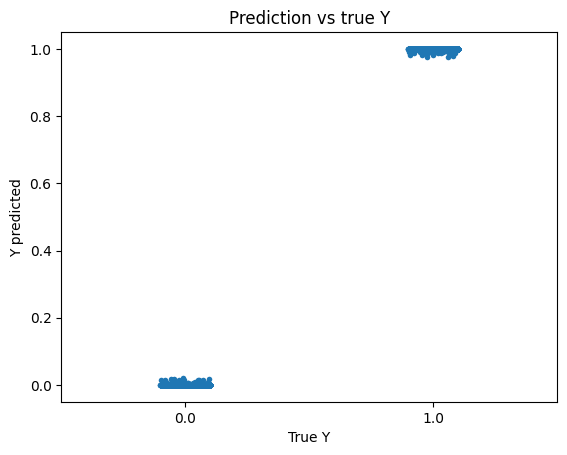

In [49]:
import seaborn as sns

sns.stripplot(data=out, x=out[0], y=out[1], size=4).set(
    xlabel="True Y", ylabel="Y predicted", title="Prediction vs true Y"
)

# Now for the Z of species

In [50]:
z_species_pred = pd.read_csv("./acol_species_Z_trace.txt", sep="\t").mean().to_numpy()
true_z_species = pd.read_csv("../acol_simulated_Z_species.txt", sep="\t")[
    "Z_state"
].to_numpy()

[Text(0.5, 0, 'True Z'),
 Text(0, 0.5, 'Z predicted'),
 (-0.1, 1.1),
 Text(0.5, 1.0, 'Species Z')]

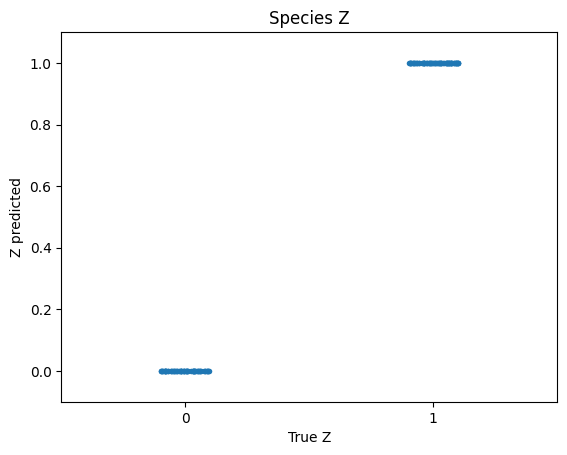

In [51]:
sns.stripplot(x=true_z_species, y=z_species_pred, size=4).set(
    xlabel="True Z", ylabel="Z predicted", ylim=(-0.1, 1.1), title="Species Z"
)

# Now for the Z of molecules

[Text(0.5, 0, 'True Z'),
 Text(0, 0.5, 'Z predicted'),
 (-0.1, 1.1),
 Text(0.5, 1.0, 'Molecules Z')]

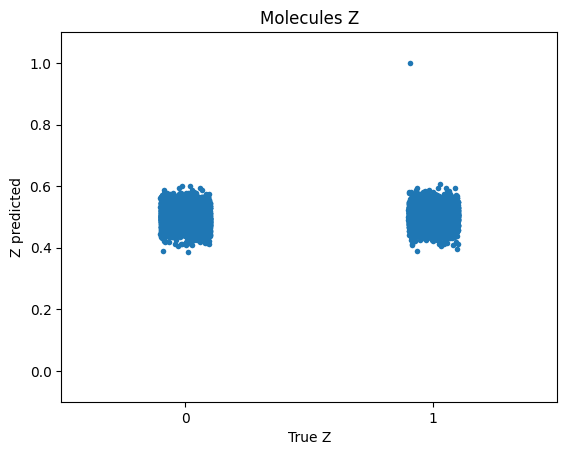

In [52]:
z_molecules_pred = (
    pd.read_csv("./acol_molecules_Z_trace.txt", sep="\t").mean().to_numpy()
)
true_z_molecules = pd.read_csv("../acol_simulated_Z_molecules.txt", sep="\t")[
    "Z_state"
].to_numpy()


sns.stripplot(x=true_z_molecules, y=z_molecules_pred, size=4).set(
    xlabel="True Z", ylabel="Z predicted", ylim=(-0.1, 1.1), title="Molecules Z"
)